#### Public Relations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reviews_df = pd.read_csv('amazon_alexa.tsv', sep='\t')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


#### Data Exploration

<Axes: >

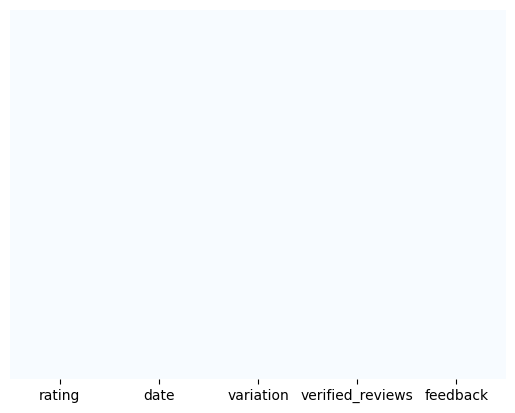

In [5]:
sns.heatmap(reviews_df.isnull(), yticklabels=False, cbar=False, cmap='Blues') # verified that there are no missing values

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

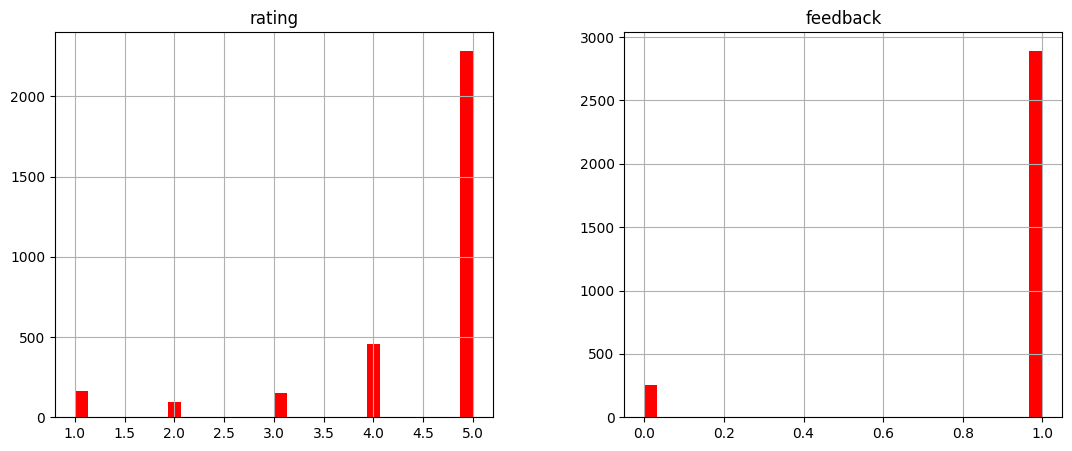

In [6]:
reviews_df.hist(bins=30, figsize=(13, 5), color='r')

In [7]:
reviews_df['length'] = reviews_df['verified_reviews'].astype(str).apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

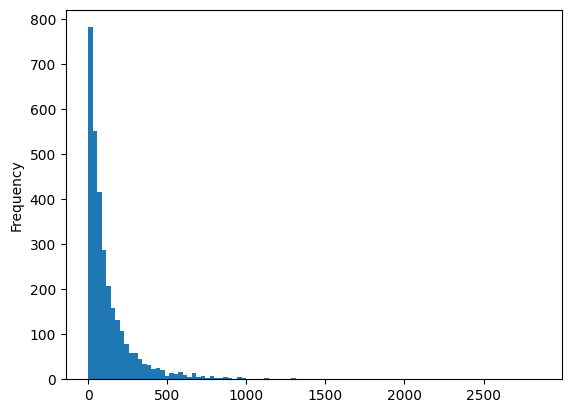

In [8]:
reviews_df['length'].plot(bins=100, kind='hist')

In [9]:
print(f'Longest message at {reviews_df["length"].max()} characters')
display(reviews_df.loc[reviews_df['length'] == reviews_df['length'].max(), 'verified_reviews'].values[0])

print(f'Shortest message at {reviews_df["length"].min()} characters')
display(reviews_df.loc[reviews_df['length'] == reviews_df['length'].min(), 'verified_reviews'].values[0])

print(f'Average length message at {reviews_df["length"].mean().astype(int)} characters')
display(reviews_df.loc[reviews_df['length'] == reviews_df['length'].mean().astype(int), 'verified_reviews'].values[0])

Longest message at 2851 characters


"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

Shortest message at 1 characters


'😍'

Average length message at 132 characters


'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [10]:
pd.set_option('display.max_colwidth', 2851) # set to max char so we can see full messages

positive = reviews_df[reviews_df['feedback'] == 1]
display(positive.sample(3))

negative = reviews_df[reviews_df['feedback'] == 0]
display(negative.sample(3))


,rating,date,variation,verified_reviews,feedback,length
253,4,29-Jul-18,Charcoal Fabric,Easy to set up.,1,15
1978,5,24-Jul-18,Black Plus,"well what can you say, Love It Love It Love It enough said",1,62
1490,5,30-Jul-18,Black Show,"Great addition to the Alexa family. Nice having the &#34;visual&#34; part of pics, recipes, etc.",1,97


,rating,date,variation,verified_reviews,feedback,length
1910,2,26-Jul-18,Black Plus,"When I got this Echo I was excited to have a device with better sound than my Dot and a hub to control some Hue bulbs.What I didn't realize and also wasn't fully communicated to me, is that you can't use Hue bulbs to their full potential with this device. You can only turn on and off the lights and set them to a number of preset colors. You also cannot update the bulbs to the newest firmare which is a security concern for me.Do not buy this if you want a full featured hub for your new IoT devices. If you do, you will end up needing to update to a standalone hub, which makes the hub inside this device redundant and pointless.I still love the echo and have zero complaints about the Alexa functionality or sound quality of this device. I'm only disappointed with the hub's functionalities.",0,795
2304,2,30-Jul-18,Configuration: Fire TV Stick,"I’m very unhappy with this Firestick, every time we change programs or channels within a program there is a very long delay. We have 2 Roku’s That work just fine and are very quick.",0,181
671,1,22-May-18,White,The first one quit working shortly after I got it. The next one becomes unresponsive to my voice at times and the only way to get it to work is through the app. I am not sure if it just this Dot or they are all this way.,0,220


/tmp/ipykernel_871/2753348350.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(reviews_df, x='feedback', palette=['red', 'green'])


<Axes: xlabel='feedback', ylabel='count'>

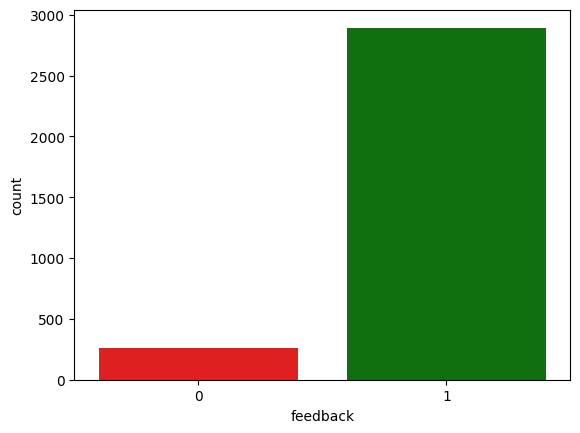

In [11]:
sns.countplot(reviews_df, x='feedback', palette=['red', 'green'])

/tmp/ipykernel_871/2857468516.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(reviews_df, x='rating', palette='viridis')


<Axes: xlabel='rating', ylabel='count'>

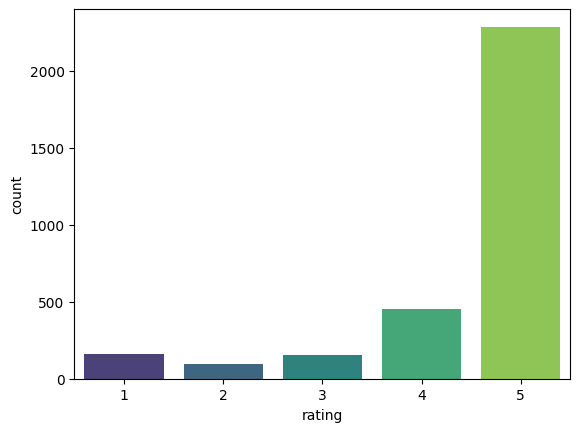

In [12]:
sns.countplot(reviews_df, x='rating', palette='viridis')

/tmp/ipykernel_871/4117600604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='variation', y='rating', data=reviews_df, palette='viridis')


<Axes: xlabel='variation', ylabel='rating'>

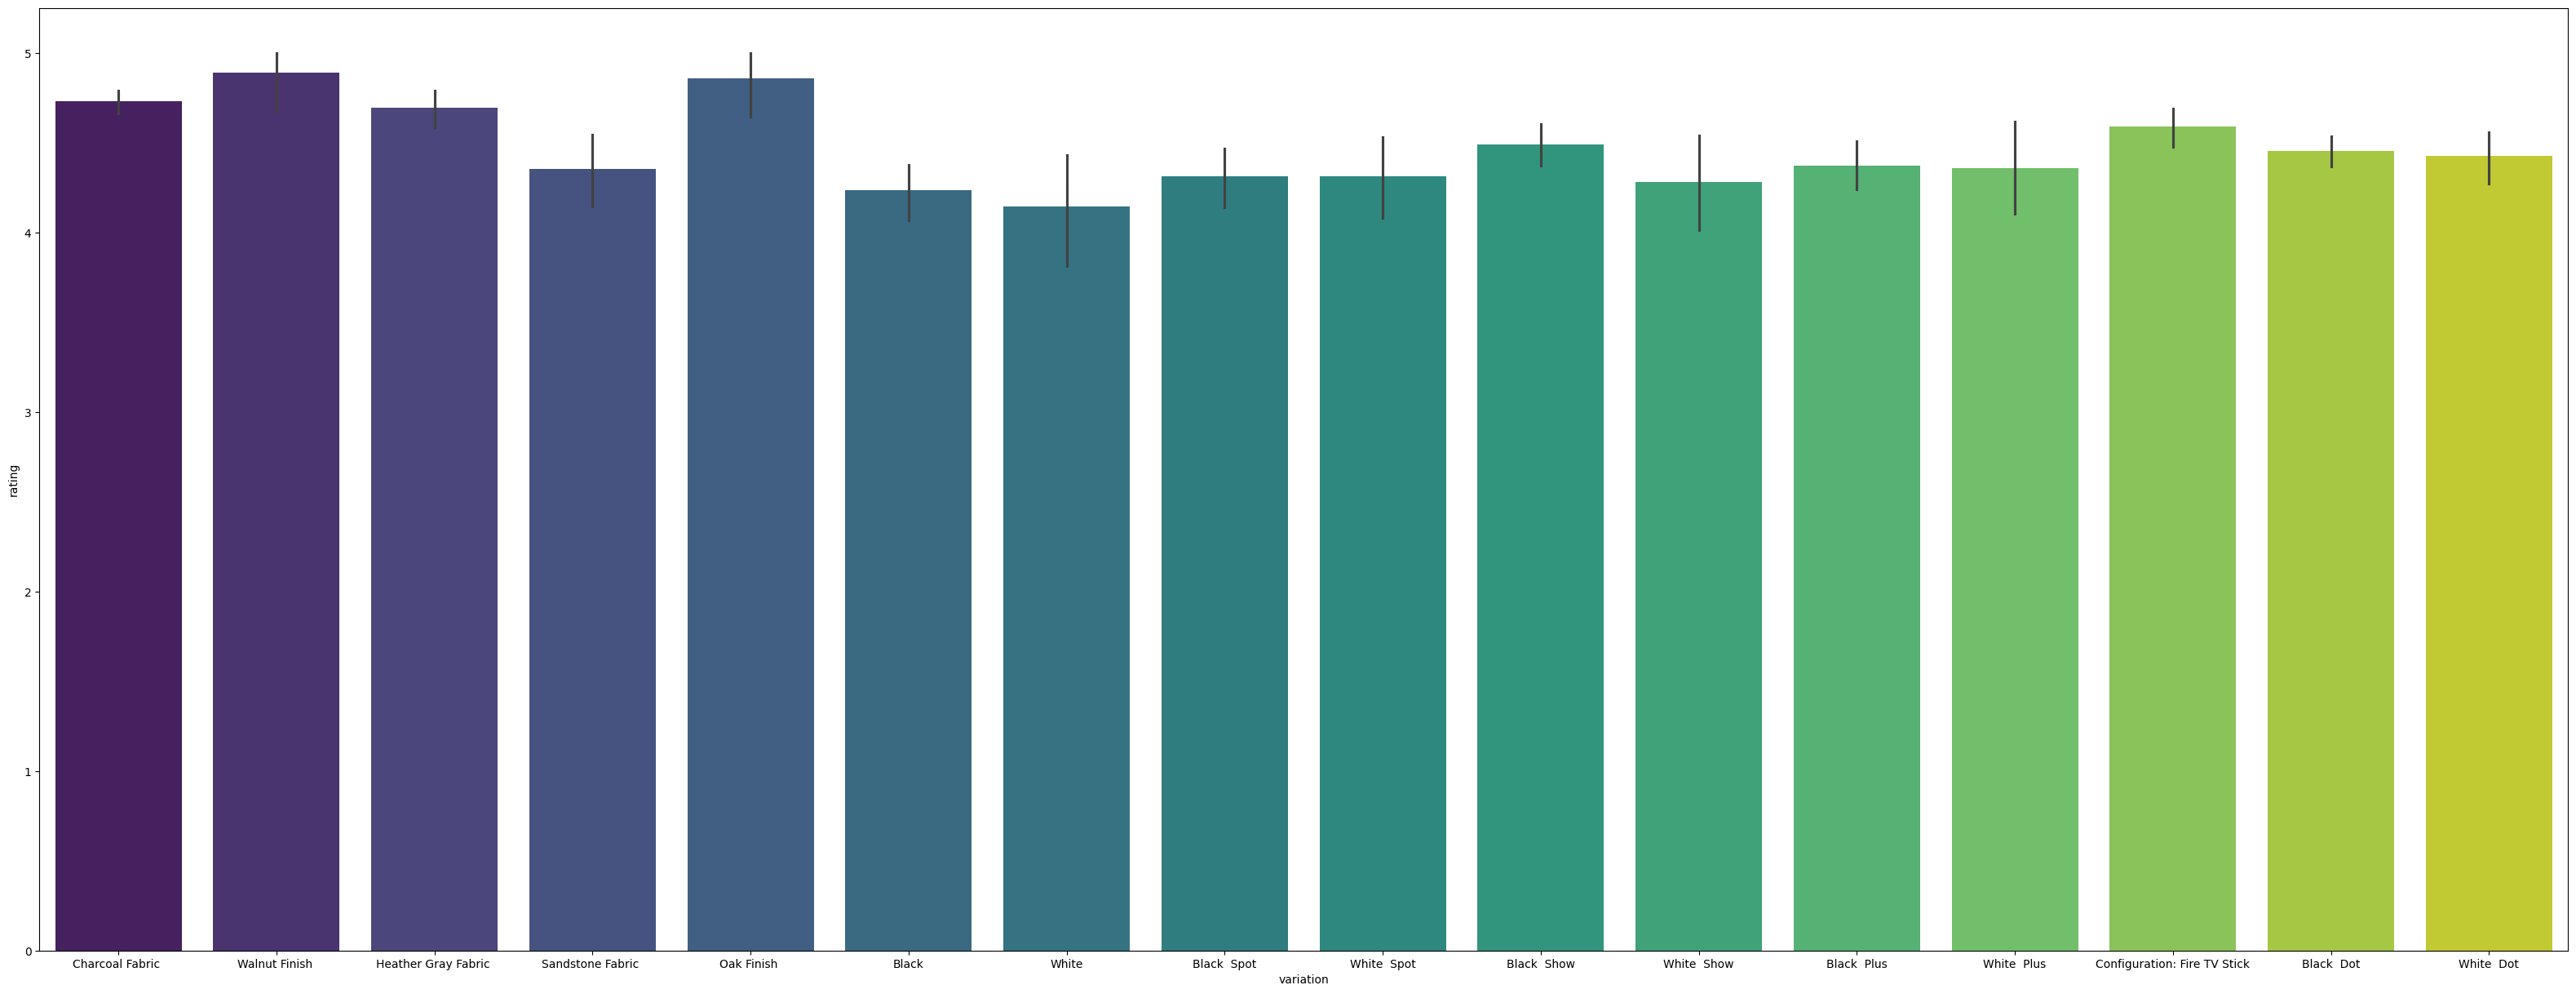

In [13]:
plt.figure(figsize=(40,15))
sns.barplot(x='variation', y='rating', data=reviews_df, palette='viridis')

In [14]:
sentences = reviews_df['verified_reviews'].astype(str).tolist()
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [15]:
sentences_as_one_string = "".join(sentences)
sentences_as_one_string

'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

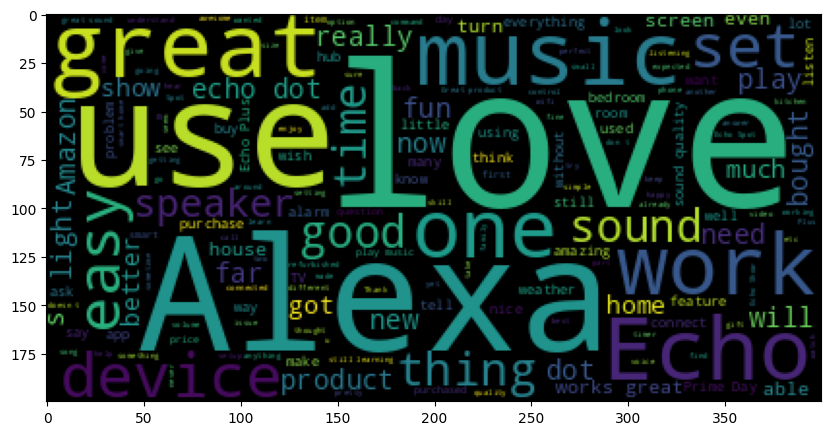

In [16]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [17]:
negative['verified_reviews'].tolist()

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

#### Data Cleaning - Variation


In [18]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,195
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [19]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis=1)

In [20]:
reviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1
3,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1
4,Charcoal Fabric,Music,1


In [21]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first=True)
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [22]:
reviews_df.drop(['variation'], axis=1, inplace=True)

In [23]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)

In [24]:
reviews_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,Loved it!,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Music,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


#### Punctuation Removal

In [25]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
test = "This is boilerplate text. Nothing cheesey, nothing squeezey, just breezey!"
test_punc_removed = test.translate(str.maketrans('', '', string.punctuation))
test_punc_removed

'This is boilerplate text Nothing cheesey nothing squeezey just breezey'

#### Remove Stopwords

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/russellsb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
test_punc_removed    

'This is boilerplate text Nothing cheesey nothing squeezey just breezey'

In [30]:
test_punc_removed_clean = [word for word in test_punc_removed.split() if word.lower() not in stopwords.words('english')]
test_punc_removed_clean

['boilerplate', 'text', 'Nothing', 'cheesey', 'nothing', 'squeezey', 'breezey']

#### Count Vectorisation: Tokenisation

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['This is boilerplate text. Nothing cheesey, nothing squeezey, just breezey!', 'Mad man to follow this mad plan', 'Bedtime zoomies. So fast and breezey!']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [32]:
print(vectorizer.get_feature_names_out())
print(X.toarray())

['and' 'bedtime' 'boilerplate' 'breezey' 'cheesey' 'fast' 'follow' 'is'
 'just' 'mad' 'man' 'nothing' 'plan' 'so' 'squeezey' 'text' 'this' 'to'
 'zoomies']
[[0 0 1 1 1 0 0 1 1 0 0 2 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0 2 1 0 1 0 0 0 1 1 0]
 [1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1]]


Note breezey both 1 in first text and last. mad mentioned twice in second text.

#### Data Cleaning - Reviews

In [33]:
def review_cleaning(review):
    """
    This pipeline cleans the reviews by (1) removing punctuation, (2) removing stopwords
    """
    test_punc_removed = review.translate(str.maketrans('', '', string.punctuation))
    test_punc_removed_clean = [word for word in test_punc_removed.split() if word.lower() not in stopwords.words('english')]
    return test_punc_removed_clean

In [34]:
verified_reviews_clean = reviews_df['verified_reviews'].astype(str).apply(review_cleaning)

In [35]:
display(verified_reviews_clean.head())
reviews_df['verified_reviews'].head()

0                                                                                                                           [Love, Echo]
1                                                                                                                                [Loved]
2        [Sometimes, playing, game, answer, question, correctly, Alexa, says, got, wrong, answers, like, able, turn, lights, away, home]
3    [lot, fun, thing, 4, yr, old, learns, dinosaurs, control, lights, play, games, like, categories, nice, sound, playing, music, well]
4                                                                                                                                [Music]
Name: verified_reviews, dtype: object

0                                                                                                                                                                                          Love my Echo!
1                                                                                                                                                                                              Loved it!
2    Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.
3                           I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
4                                                                                                                                                                                                  M

We note that the drop in punctuation and stop words is applied case-by-case

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vecotrizer = CountVectorizer(analyzer=review_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'].astype(str))

In [37]:
print([*vectorizer.get_feature_names_out()])

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [38]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
reviews_countvectorizer.shape

(3150, 4045)

In [40]:
reviews_df.drop(["verified_reviews"], axis=1, inplace=True)  # dropping initial string entries to replace with numerical encoding of count vectorizer

In [41]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
reviews

,0,1,2,3,4,5,6,7,8,9,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,4044
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
reviews_df = pd.concat([reviews_df, reviews], axis=1)
reviews_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4035,4036,4037,4038,4039,4040,4041,4042,4043,4044
0,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,1,False,False,False,False,True,False,False,False,False,...,0,1,0,0,0,0,0,0,0,0
4,1,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Creating X, y. Dropping target from training set
X = reviews_df.drop(['feedback'], axis=1)
y = reviews_df['feedback']

##### Train Naive Bayes Classifier

In [47]:
X.columns = X.columns.astype(str) 

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [50]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([1, 1, 1, ..., 1, 1, 1])

<Axes: >

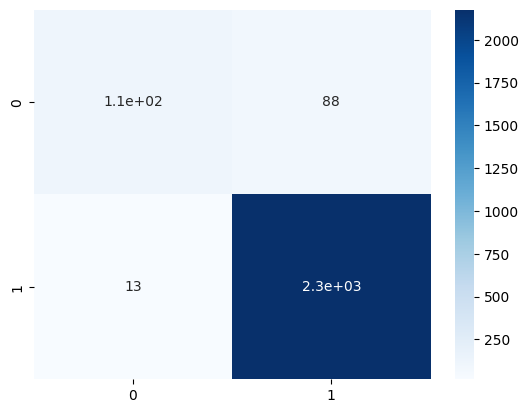

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, cmap='Blues') # not diagonally linear in colour but in values. Valid due to class imbalance (alot more classes with positive review).

<Axes: >

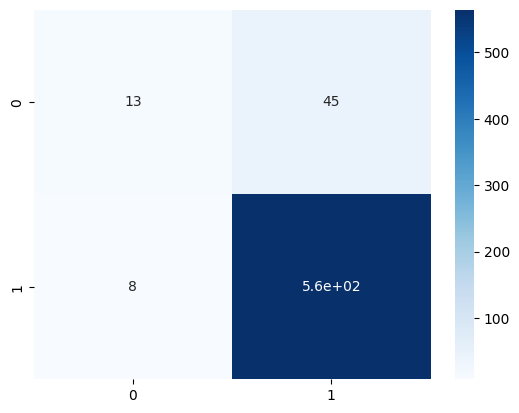

In [53]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, cmap='Blues') # not diagonally linear in colour but in values. Valid due to class imbalance (alot more classes with positive review).

In [54]:
print(classification_report(y_test, y_predict_test)) # mediocre precision, poor recall

              precision    recall  f1-score   support

           0       0.62      0.22      0.33        58
           1       0.93      0.99      0.96       572

    accuracy                           0.92       630
   macro avg       0.77      0.61      0.64       630
weighted avg       0.90      0.92      0.90       630



#### Logistic Regression Classifier

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # better recall and precision than naive bayes

              precision    recall  f1-score   support

           0       0.71      0.43      0.54        58
           1       0.94      0.98      0.96       572

    accuracy                           0.93       630
   macro avg       0.83      0.71      0.75       630
weighted avg       0.92      0.93      0.92       630

